<a href="https://colab.research.google.com/github/HanRunbing/Tool_boxes/blob/main/PCA_lambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt 

# PCA test

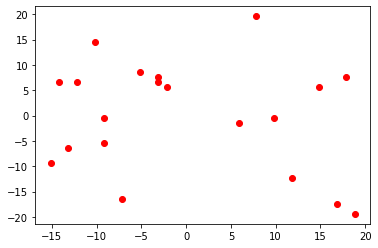

In [ ]:
#Generate a dummy dataset.
X = np.random.randint(10,50,40).reshape(20,2) 
# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)
for x,y in X_meaned:
  plt.scatter(x,y,c= 'r')

In [ ]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)

In [ ]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 1 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [ ]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
X_reduced[1:5]

array([[ 4.61391213],
       [-8.41544773],
       [-9.24427868],
       [ 6.8385764 ]])

Text(0.5, 1.0, 'original dataset')

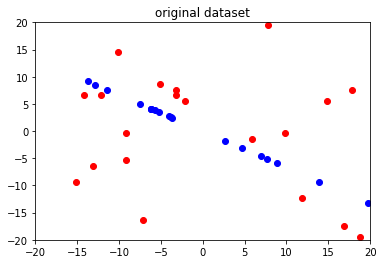

In [ ]:
for x,y in X_meaned:
  plt.scatter(x,y,c= 'r')
for i in X_reduced:
  plt.scatter(eigenvector_subset[0]*i,eigenvector_subset[1]*i,c = 'b')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.title('original dataset')

In [ ]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced,eigenvector_subset

# Test with Lambda

## lambda = 0.5

Create a new array N, first dimention is own expression, scale with sqrt(1 -lam), second dimention is neightborhood expression,scale with sqrt(lam)

Text(0.5, 1.0, 'lambda = 0.5')

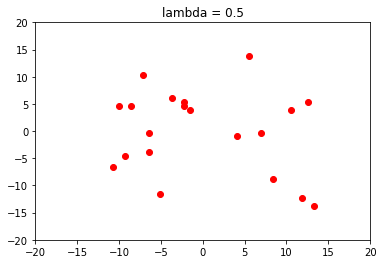

In [ ]:
# apply lambda. first dimention is own expression
lam = 0.5
N = np.zeros((20,2))
N[:,0]= np.sqrt(1 -lam) * X_meaned[:,0]
N[:,1]= np.sqrt(lam) * X_meaned[:,1]
for x,y in N:
  plt.scatter(x,y,c= 'r')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.title('lambda = 0.5')

Looks pretty much like the orignal pca result

Text(0.5, 1.0, 'lambda = 0.5')

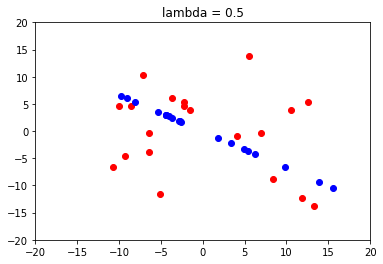

In [ ]:
N_reduced,eigenvector_subset = PCA(N , 1)
for x,y in N:
  plt.scatter(x,y,c= 'r')
N_reduced = np.dot(eigenvector_subset.transpose(),N.transpose()).transpose()
for i in N_reduced:
  plt.scatter(eigenvector_subset[0]*i,eigenvector_subset[1]*i,c = 'b')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.title('lambda = 0.5')

## Lambda = 0.1

When lambda = 0.1,  PCA result (eigenvector) is mainly dominated by first dimention(own exp)

Text(0.5, 1.0, 'lambda = 0.1')

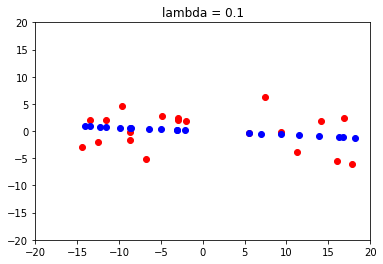

In [ ]:
# apply lambda. first dimention is own expression
lam = 0.1
N = np.zeros((20,2))
N[:,0]= np.sqrt(1 -lam) * X_meaned[:,0]
N[:,1]= np.sqrt(lam) * X_meaned[:,1]
N_reduced,eigenvector_subset = PCA(N , 1)
for x,y in N:
  plt.scatter(x,y,c= 'r')
for i in N_reduced:
  plt.scatter(eigenvector_subset[0]*i,eigenvector_subset[1]*i,c = 'b')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.title('lambda = 0.1')

## Lambda = 0.9

When lambda = 0.9, PCA result (eigenvector) is mainly dominated by second dimention(neighborhood exp)

Text(0.5, 1.0, 'lambda = 0.1')

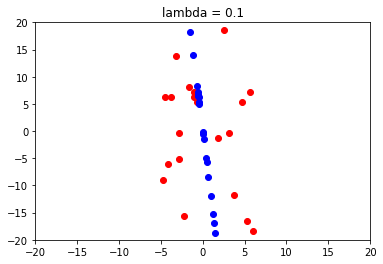

In [ ]:
# apply lambda. first dimention is own expression
lam = 0.9
N = np.zeros((20,2))
N[:,0]= np.sqrt(1 -lam) * X_meaned[:,0]
N[:,1]= np.sqrt(lam) * X_meaned[:,1]
N_reduced,eigenvector_subset = PCA(N , 1)
for x,y in N:
  plt.scatter(x,y,c= 'r')
for i in N_reduced:
  plt.scatter(eigenvector_subset[0]*i,eigenvector_subset[1]*i,c = 'b')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.title('lambda = 0.1')